In [1]:
import time 
from SimpleFSM import FSM, State, state_action, state_transition

In [2]:
# Helper methods to make a generator for testing
def list_token_generator(data_list):
    for item in data_list:
        time.sleep(3)
        yield item

data_list_alternates = ['strawberry', 'lemon', 'strawberry', 'lemon', 'strawberry', 'lemon', 'strawberry', 'lemon', 'strawberry']
data_list_strawberry_repeats = ['strawberry', 'lemon', 'strawberry', 'strawberry', 'lemon', 'strawberry', 'lemon', 'strawberry']
data_list_3_strawberry = ['strawberry', 'lemon', 'strawberry', 'strawberry','strawberry']
data_list_both_repeats = ['strawberry', 'lemon', 'strawberry', 'strawberry','strawberry', 'strawberry','strawberry', 'lemon', 'lemon', 'lemon', 'lemon']

## Toy Problem 

In [3]:
class LollipopFSM(FSM):
  normal_state = State("normal_state", is_start=True)
  alert_state = State("alert_state")
  non_normal_state = State("non_normal_state")

  def __init__(self, *args, **kwargs):
    super().__init__(*args, **kwargs)

  @staticmethod
  @state_action("normal_state")
  def process_normal(event_item, context_data)->None:
    print("processing normally")

  @staticmethod
  @state_transition("normal_state", ["normal_state", "alert_state"])
  def normal_transition(event_item, context_data)->str:
    if event_item == context_data['last_flavor']:
      if context_data['streak'] == 2:
        return "alert_state"
      else:
        context_data["streak"] += 1
    else: 
      context_data['last_flavor'] = event_item
      context_data["streak"] = 1
    
    return "normal_state"

  @staticmethod
  @state_action("alert_state")
  def process_alert(event_item, context_data)->None:
     print(f"Alert: More than 2 {context_data['last_flavor']} encountered")


  @staticmethod
  @state_transition("alert_state", ["normal_state", "non_normal_state"])
  def alert_transition(event_item, context_data)->str:
    if event_item == context_data['last_flavor']:
      context_data["streak"] += 1
      return 'non_normal_state'
    else:
      context_data['last_flavor'] = event_item
      context_data["streak"] = 1
      return 'normal_state'
    
  @staticmethod
  @state_action("non_normal_state")
  def process_non_normal(event_item, context_data)->None:
    print("processing in non-normal state")

  @staticmethod
  @state_transition("non_normal_state", ["normal_state", "non_normal_state"])
  def non_normal_transition(event_item, context_data)->str:
    if event_item != context_data['last_flavor']:
      context_data['last_flavor'] = event_item
      context_data["streak"] = 1
      return 'normal_state'
    else:
      context_data["streak"] += 1
      return 'non_normal_state'


In [4]:
list_gen = list_token_generator(data_list_alternates)
lollie = LollipopFSM(replace_checkpoint=True, checkpoint_every=2, user_context_data={'streak': 0, 'last_flavor': None})

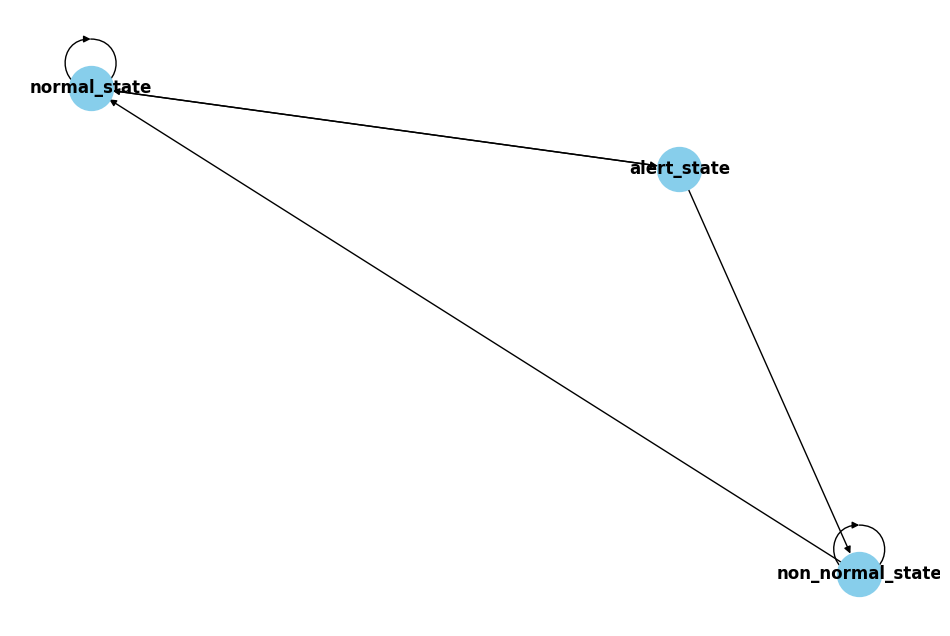

In [6]:
lollie.plot_graph(fig_size=(12, 8))

In [7]:
lollie.start(list_gen)

processing normally
processing normally
processing normally
processing normally
processing normally
processing normally
processing normally
processing normally
processing normally
save and exit


In [8]:
# With strawberry repeat
list_gen = list_token_generator(data_list_strawberry_repeats)
lollie = LollipopFSM(replace_checkpoint=True, checkpoint_every=2, user_context_data={'streak': 0, 'last_flavor': None})
lollie.start(list_gen)

processing normally
processing normally
processing normally
processing normally
processing normally
processing normally
processing normally
processing normally
save and exit


In [9]:
# With > 3 strawberries
list_gen = list_token_generator(data_list_3_strawberry)
lollie = LollipopFSM(replace_checkpoint=True, checkpoint_every=2, user_context_data={'streak': 0, 'last_flavor': None})
lollie.start(list_gen)


processing normally
processing normally
processing normally
processing normally
Alert: More than 2 strawberry encountered
save and exit


In [10]:
# Multiple repeats for both strawberry and lemon
list_gen = list_token_generator(data_list_both_repeats)
lollie = LollipopFSM(replace_checkpoint=True, checkpoint_every=2, user_context_data={'streak': 0, 'last_flavor': None})
lollie.start(list_gen)

processing normally
processing normally
processing normally
processing normally
Alert: More than 2 strawberry encountered
processing in non-normal state
processing in non-normal state
processing normally
processing normally
Alert: More than 2 lemon encountered
processing in non-normal state
save and exit
